<font face="B Mitra" size=4>
<div dir=rtl align=center>

<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">

<br>
<font size=2>
<b>دانشگاه صنعتی امیرکبیر - دانشکده ریاضی و علوم کامپیوتر</b>
</font>

<br>
<font size=6>
<b>گرافیک کامپیوتری</b>
</font>

<br>
<hr/>
<font size=6>
<b>تمرین چهارم</b>
</font>

<br>
استاد: دکتر مصطفی شمسی

<br>
طراحان:‌ پیمان پاک نژاد، مهدی رضی، امیرعطا غفاریان و امیرحسین آذرپور

<hr>
</div>
</font>


<font face="B Mitra" size=5>
<div dir=rtl>

<p>
<font size=4>
لطفا فایل نوت بوک نهایی را با الگوی زیر در سامانه کورسز آپلود کنید.
</font>
</p>

<div dir=ltr>
<font face="Times New Roman" size=4 dir=ltr>
شماره دانشجویی_CG_HW4.ipynb
</font>
</div>

</div>

<div dir=rtl>

<p align="justify">
<font size=4 color="lightblue">
در صورتی که فایل را به صورت لوکال باز‌ می‌کنید، از دستورات مناسب که در فایل تمرین سری اول وجود داشت جهت نمایش تصاویر استفاده کنید.
</font>
</div>
</font>

<font face="B Mitra" size=4>

<hr>
<div dir="rtl">
    <h3>کتابخانه‌های مورد نیاز</h3>
    <p>صرفا سلول زیر را اجرا کنید</p>
</div>
</font>

In [ ]:
import cv2
import requests
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def read_image_from_url(url, flags=cv2.IMREAD_COLOR):
    response = requests.get(url)
    response.raise_for_status()
    img_array = np.array(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, flags)
    return img

<font face="B Mitra" size=4>
    <div dir="rtl">
    <h3>هیستوگرام</h3>
        <p>هیستوگرام تصویر، که نموداری از توزیع شدت‌های روشنایی یا رنگ‌ها در یک تصویر است، ابزار مهمی برای درک اطلاعات مربوط به کنتراست و تعادل نور در تصویر می‌باشد. این اطلاعات به عکاسان و ویراستاران کمک می‌کند تا بهینه‌سازی های مورد نیاز بر روی تصاویر را شناسایی و اعمال کنند، و از این طریق کیفیت بصری نهایی تصویر را ارتقاء دهند.</p>
        </font>
        <font face="B Mitra" size=5 color='e74c3c'>
        ابتدا هر تصویر را نمایش داده و سپس هیستوگرام را برای تصاویر رسم کرده و کنتراست روشنایی و رنج دینامیکی هر تصویر را تحلیل کنید.
        </font>
    </div>
</font>

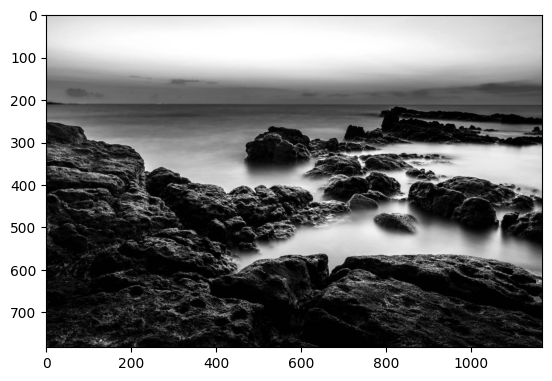

In [ ]:
# Load the input image
image = read_image_from_url("https://i.ibb.co/JKD9YQS/sea.png")

#TODO: Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

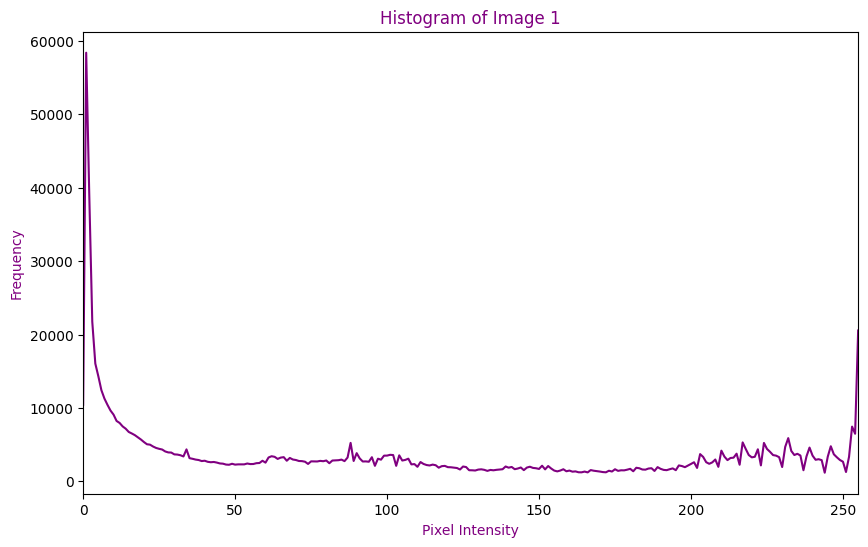

In [ ]:
#TODO: plot the histogram of the image
hist1 = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.plot(hist1, color='Purple')
plt.title('Histogram of Image 1', color='Purple')
plt.xlabel('Pixel Intensity', color='Purple')
plt.ylabel('Frequency', color='Purple')
plt.xlim([0, 255])
plt.show()

<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
<b>
روشنایی:
</b>
<br>
روشنایی تصویر به نسبت کم و بیش‌تر به تیرگی تمایل دارد. قله اصلی هیستوگرام در سمت چپ نمودار یعنی سطوح شدت پیکسل پایین‌تر (بازه 0 تا 50) قرار دارد که نشان‌دهنده‌ی مناطق بسیار تیره در تصویر است. گرچه قله‌های کوچک در بازه 200 تا 255 نشان‌دهنده‌ی وجود عناصر روشن در تصویر می‌باشد، اما به صورت کلی تصویر نسبتا تیره است.
<br>
<b>
کنتراست:
</b>
<br>
همان‌طور که گفته شد، در این هیستوگرام قله‌ی بزرگی در مقادیر نزدیک به 0 و همچنین قله‌های کوچکی در مقادیر نزدیک به 255 دیده می‌شود، اما مقادیر میانی (بین 50 تا 200) نسبتاً یکنواخت و کم‌تعداد هستند. این نشان می‌دهد که تصویر کنتراست بالایی ندارد زیرا اختلاف شدت روشنایی بین قسمت‌های مختلف تصویر محدود است. پس تصویر کنتراست متوسط رو به پایینی دارد.
<br>
<b>
رنج دینامیکی:
</b>
<br>
رنج دینامیکی تصویر از 0 تا حدود 250 کشیده شده است، بنابراین ظاهرا رنج دینامیکی تقریبا کاملی در تصویر وجود دارد. با این حال، این رنج خیلی موثر نیست؛ زیرا بخش زیادی از پیکسل‌ها در شدت‌های پایین و بخش کوچکی در شدت‌های نزدیک به 255 قرار دارند، درحالی‌که مقادیر میانی چشم‌گیر نیستند.
</p>
</font>
</div>
<hr>

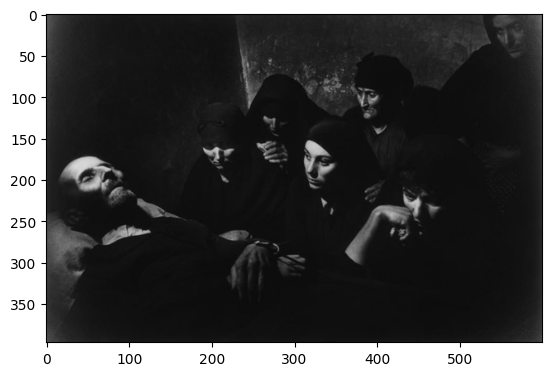

In [ ]:
# Load the input image
image = read_image_from_url("https://i.ibb.co/HTn3gZx/img.jpg")

#TODO: Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

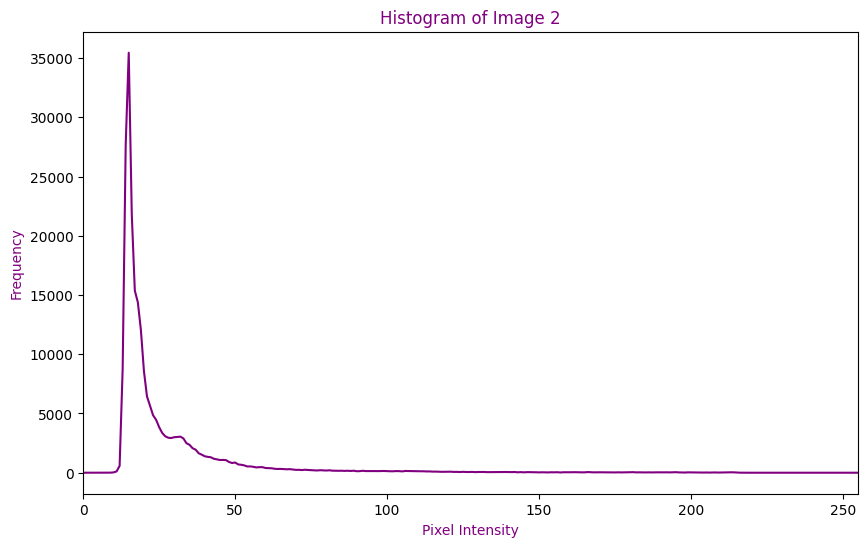

In [ ]:
#TODO: plot the histogram of the image
hist2 = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.plot(hist2, color='Purple')
plt.title('Histogram of Image 2', color='Purple')
plt.xlabel('Pixel Intensity', color='Purple')
plt.ylabel('Frequency', color='Purple')
plt.xlim([0, 255])
plt.show()

<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
<b>
روشنایی:
</b>
<br>
با توجه به هیستوگرام، این تصویر تیره یا Underexposed می‌باشد؛ زیرا تراکم بیش‌تر پیکسل‌ها در شدت‌های پایین پیکسل یعنی بازه 20 تا 60 می‌باشد و این متمرکز شدن هیستوگرام در سمت صفر نشان‌دهنده‌ی تصویر تاریک است.
<br>
<b>
کنتراست:
</b>
<br>
کنتراست این تصویر پایین است؛ زیرا همان‌طور که گفته شد تمرکز شدت‌های روشنایی مختلف در ناحیه نزدیک به صفر قرار دارد و یعنی عناصر مختلف تصویر از لحاظ تیرگی مشابه یکدیگر هستند و در شدت‌ روشنایی بالاتر ما پیکسل‌های خیلی کمی داریم.
<br>
<b>
رنج دینامیکی:
</b>
<br>
رنج دینامیکی این تصویر محدود و کم است، زیرا تعداد شدت‌های متمایز زیادی نداریم و تعداد شدت‌ها بیشتر در بازه 20 تا 60 قرار گرفته‌اند.
</p>
</font>
</div>
<hr>

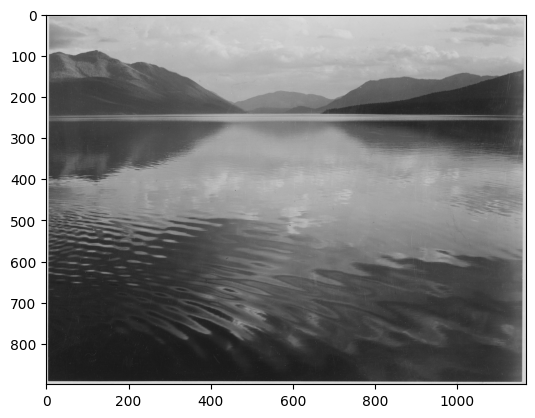

In [ ]:
# Load the input image
image = read_image_from_url("https://i.ibb.co/7C0HcYV/B.jpg")

#TODO: Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

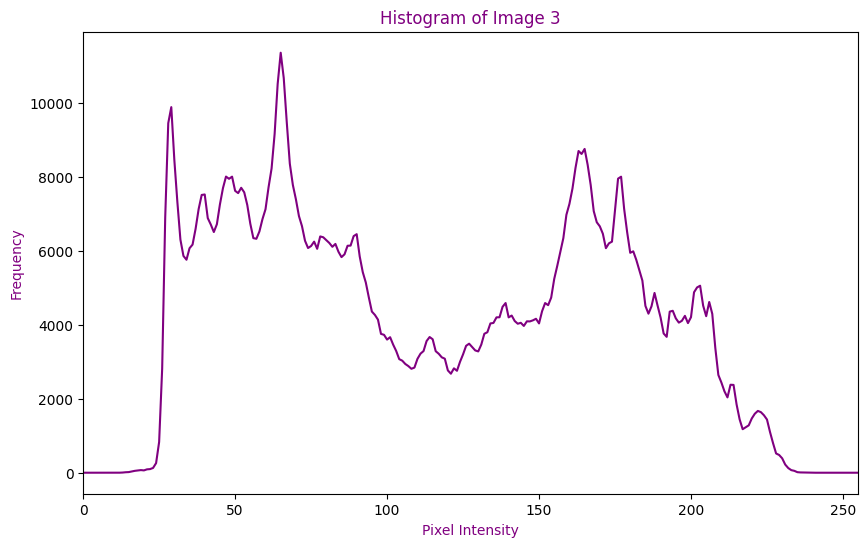

In [ ]:
#TODO: plot the histogram of the image
hist3 = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.plot(hist3, color='Purple')
plt.title('Histogram of Image 3', color='Purple')
plt.xlabel('Pixel Intensity', color='Purple')
plt.ylabel('Frequency', color='Purple')
plt.xlim([0, 255])
plt.show()

<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
<b>
روشنایی:
</b>
<br>
روشنایی تصویر به صورت کلی متوسط است. چرا که مقادیر شدت روشنایی به‌طور نسبتا یکنواخت در کل بازه‌ی 0 تا 255 توزیع شده‌اند.
این هیستوگرام نشان می‌دهد که تصویر شامل قسمت‌هایی هم با شدت روشنایی کم، هم متوسط، و هم بالا است.
<br>
<b>
کنتراست:
</b>
<br>
تصویر کنتراست متوسط رو به بالایی دارد. هیستوگرام دارای چندین فراز و فرود است که نشان‌دهنده تنوع نسبتا زیاد شدت‌های روشنایی در تصویر است و اختلاف بین قسمت‌های روشن و تیره در تصویر نسبتا بالا می‌باشد.
<br>
<b>
رنج دینامیکی:
</b>
<br>
تصویر از یک رنج دینامیکی گسترده‌ای استفاده کرده است، چرا که مقادیر شدت روشنایی از نزدیک به 0 تا حدود 250 پوشش داده شده‌اند و طیف میانی (50 تا 200) مقادیر زیادی از پیکسل‌ها را شامل می‌شود.
</p>
</font>
</div>
<hr>

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
            بهبود کنتراست در تصاویر به معنی افزایش تفاوت شدت‌های نوری بین نقاط تاریک و روشن آن است، که منجر به تصاویر واضح‌تر و با جزئیات بیشتر می‌شود. روش‌های مختلفی برای این منظور وجود دارد، از جمله استفاده از توابع تبدیل خطی که دامنه شدت‌های را گسترش می‌دهد و هیستوگرام تصویر را فراگیرتر می‌کند.
            <br/>
            <br/>
            <font face="B Mitra" size=5 color='e74c3c'>
            با استفاده از توابع تبدیل خطی که در درس آموختید نگاتیو تصویر زیر را به تصویر مناسب تبدیل کنید.
            </font>
        </p>
    </div>
    
</font>

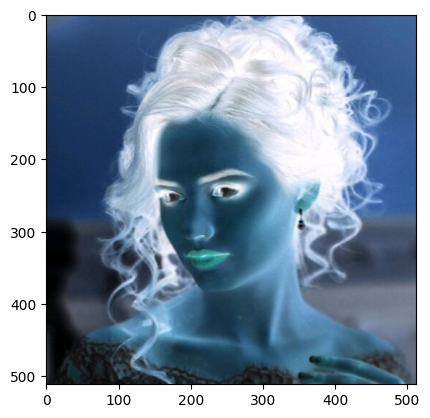

In [ ]:
# Load the input image
image = read_image_from_url("https://i.ibb.co/pnFJy5w/negative.png")

#TODO: Show the image(it is a color image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

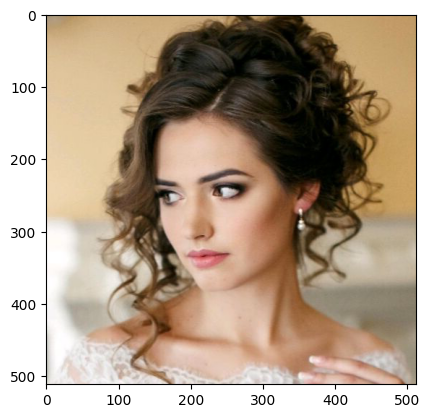

In [ ]:
#TODO: implement negative transformation
correct_negative_img = 255 - image
plt.imshow(cv2.cvtColor(correct_negative_img, cv2.COLOR_BGR2RGB))
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
            <font face="B Mitra" size=5 color='e74c3c'>
            هیستوگرام تصویر اولیه و نهایی را رسم کرده و تفاوت آن‌ها را تحلیل کنید.
            </font>
        </p>
    </div>
    
</font>

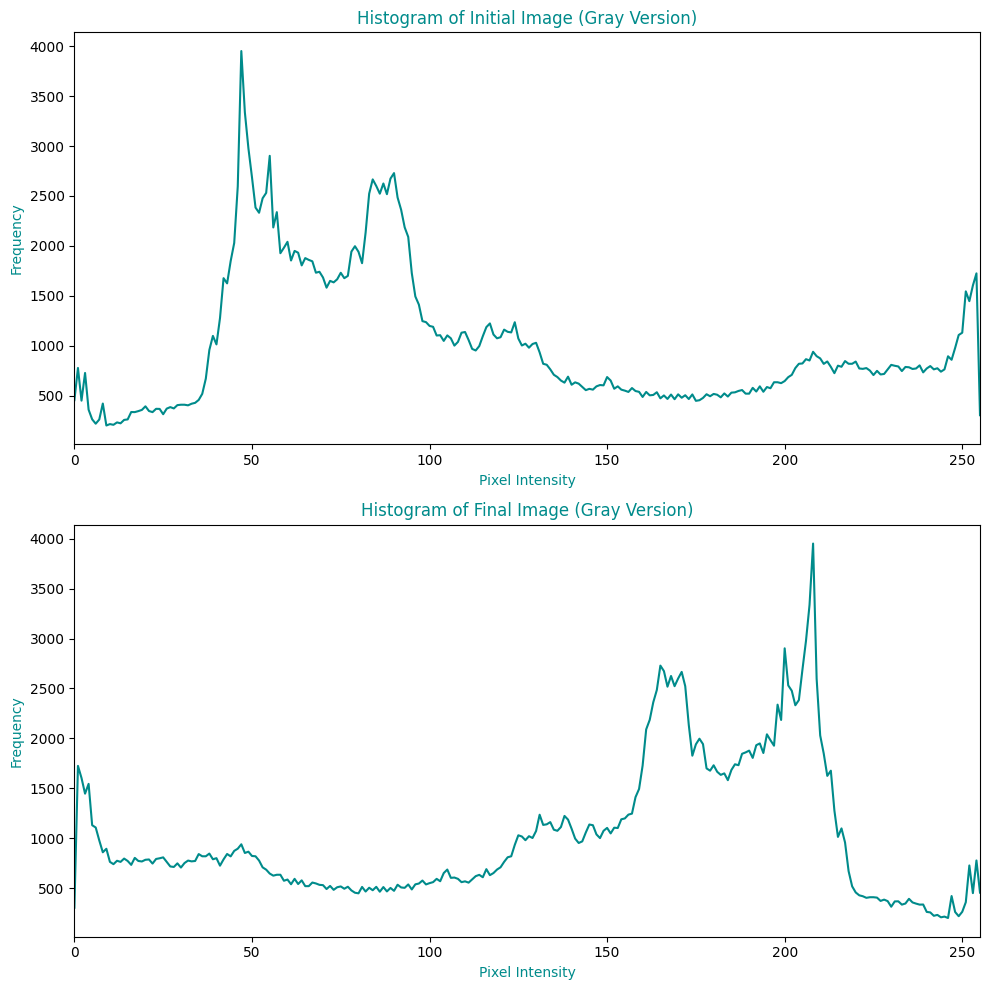

In [ ]:
#TODO: plot the histogram of the image before and after the transformation
gray_Initial_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_final_img = cv2.cvtColor(correct_negative_img, cv2.COLOR_BGR2GRAY)

hist_Initial_img = cv2.calcHist([gray_Initial_img], [0], None, [256], [0, 256])
hist_final_img = cv2.calcHist([gray_final_img], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(hist_Initial_img, color='darkcyan')
plt.title('Histogram of Initial Image (Gray Version)', color='darkcyan')
plt.xlabel('Pixel Intensity', color='darkcyan')
plt.ylabel('Frequency', color='darkcyan')
plt.xlim([0, 255])

plt.subplot(2, 1, 2)
plt.plot(hist_final_img, color='darkcyan')
plt.title('Histogram of Final Image (Gray Version)', color='darkcyan')
plt.xlabel('Pixel Intensity', color='darkcyan')
plt.ylabel('Frequency', color='darkcyan')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
با توجه به نوع ضابطه تابع نگاتیو، برای ما قابل حدس است که هیستوگرام تصویر اولیه و نهایی در راستای افقی باید قرینه‌ی یکدیگر باشند که وقتی این دو هیستوگرام را رسم می‌کنیم به همین نتیجه می‌رسیم. با توجه به هیستوگرام نسخه خاکستری شده این تصاویر، تصویر اولیه نسبتا تیره‌ (چون بیش‌تر پیکسل‌ها در بازه شدت روشنایی 40 تا 120 قرار دارند) و در مقابل تصویر نهایی نسبتا روشن (چون بیش‌تر پیکسل‌ها در بازه شدت روشنایی 130 تا 210 قرار دارند) است. همچنین کنتراست هر دو تصویر متوسط و رنج دینامیکی‌شان نیز وسیع و کامل است.
</p>
</font>
</div>
<hr>

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3>تابع تبدیل شدت لگاریتمی</h3>
         <p>تابع تبدیل لگاریتمی در پردازش تصاویر با تأکید بر نمایش جزئیات در ناحیه‌های تاریک استفاده می‌شود. این تبدیل با استفاده از لگاریتم، شدت‌های پایین تصویر را افزایش داده و کنتراست را در این نواحی بهبود می‌بخشد، منجر به آشکارسازی بهتر جزئیات می‌شود.
         <br/><br/>
         <font face="B Mitra" size=5 color='e74c3c'>
    این تابع را بر روی تصویر زیر اعمال کرده و تصویر جدید را نمایش دهید.
        </font>
        </p>
    </div>
</font>

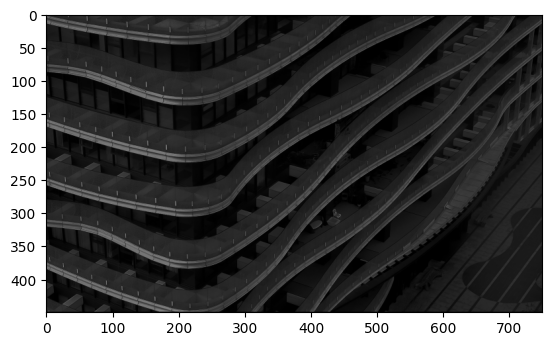

In [79]:
# Load the input image
image = read_image_from_url("https://i.ibb.co/2t2Z20K/house1.jpg", cv2.IMREAD_GRAYSCALE)
height, width = image.shape
image = cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)

#TODO: Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

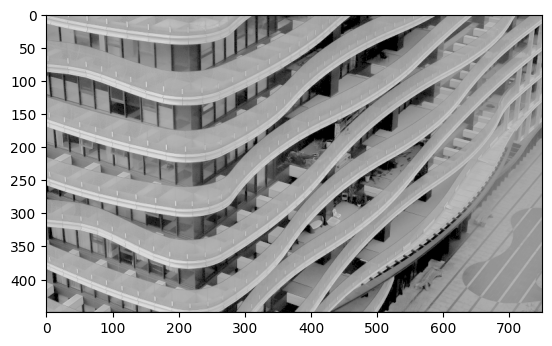

In [ ]:
#TODO: implement log transformation
c = 255 / np.log(256)
log_image = c * np.log(1 + image)
log_image = np.clip(log_image, 0, 255).astype(np.uint8)

plt.imshow(cv2.cvtColor(log_image, cv2.COLOR_BGR2RGB))
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
            <font face="B Mitra" size=5 color='e74c3c'>
            هیستوگرام تصویر اولیه و نهایی را رسم کرده و تفاوت آن‌ها را تحلیل کنید.
            </font>
        </p>
    </div>
    
</font>

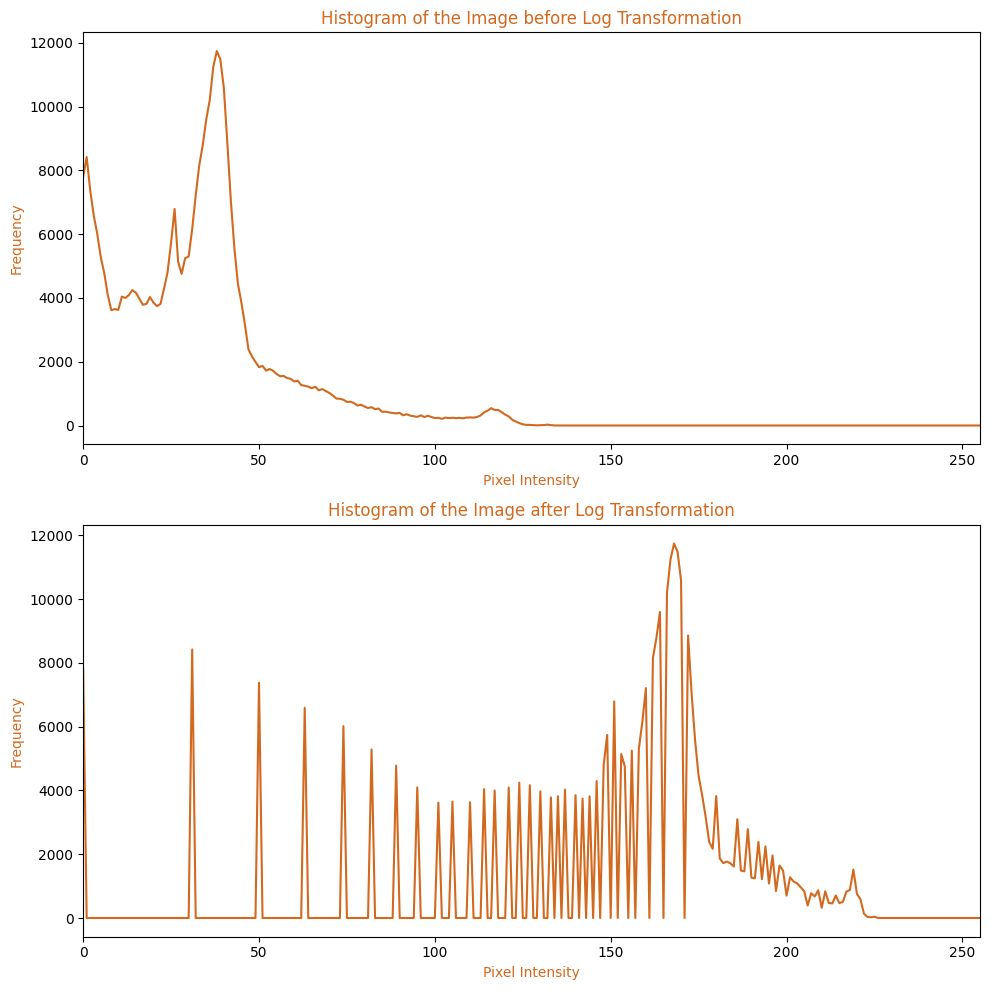

In [ ]:
#TODO: plot the histogram of the image before and after the transformation
hist_original_img = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_log_img = cv2.calcHist([log_image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(hist_original_img, color='chocolate')
plt.title('Histogram of the Image before Log Transformation', color='chocolate')
plt.xlabel('Pixel Intensity', color='chocolate')
plt.ylabel('Frequency', color='chocolate')
plt.xlim([0, 255])

plt.subplot(2, 1, 2)
plt.plot(hist_log_img, color='chocolate')
plt.title('Histogram of the Image after Log Transformation', color='chocolate')
plt.xlabel('Pixel Intensity', color='chocolate')
plt.ylabel('Frequency', color='chocolate')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
هیستوگرام تصویر اولیه دارای توزیع غیریکنواخت و هیستوگرام تصویر نهایی دارای توزیع یکنواخت‌تری است؛ هیستوگرام تصویر اولیه دارای قله‌های قابل توجهی در شدت‌های پایین پیکسل‌ها هست اما در تصویر نهایی شدت‌های روشنایی بهتر توزیع شده‌اند. در تصویر اولیه اکثر پیکسل‌ها در ناحیه‌های تیره‌تر متمرکز شده‌اند و با افزایش شدت، تعداد پیکسل‌ها کاهش می‌یابد که به معنای تیره بودن عکس و کنتراست پایین تصویر اولیه است، اما تبدیل لگاریتمی باعث می‌شود نواحی تیره‌تر بیش‌تر روشن شوند و جزئیات در این نواحی نمایان‌تر گردند، در نتیجه در تصویر نهایی روشنایی کلی تصویر افزایش پیدا کرده و کنتراست نیز بهبود یافته است و پیکسل‌ها در دامنه وسیع‌تری از شدت‌ها توزیع شده‌اند. همچنین رنج دینامیکی تصویر نیز بعد از تبدیل لگاریتمی به طرز قابل توجهی افزایش یافته است.
</p>
</font>
</div>
<hr>

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3>تابع تبدیل شدت ریشه دوم</h3>
         <p>تابع تبدیل ریشه دوم در پردازش تصویر برای بهبود نمایش جزئیات در نواحی تاریک و کاهش اثر شدت‌های بسیار بالا استفاده می‌شود. این تبدیل با استفاده از ریشه دوم، شدت‌های پایین تصویر را افزایش داده و شدت‌های بالا را کاهش می‌دهد، که منجر به نمایش متعادل‌تر تصویر و آشکارسازی بهتر جزئیات در نواحی کم‌نور می‌شود. این تابع به صورت زیر تعریف می‌شود:<br>
<math>
    <msub>
        <mi>V</mi>
        <mi>out</mi>
    </msub>
    <mo>=</mo>
    <mi>C</mi>
    <mo>&#8730;</mo>
    <msub>
        <mi>V</mi>
        <mi>in</mi>
    </msub>
</math>
         <br/><br/>
         <font face="B Mitra" size=5 color='e74c3c'>
    این تابع را بر روی تصویر زیر اعمال کرده و تصویر جدید را نمایش دهید. مقدار C را طوری انتخاب کنید که به‌ازای مقدار ورودی 255، خروجی نیز 255 شود.
        </font>
        </p>
    </div>
</font>

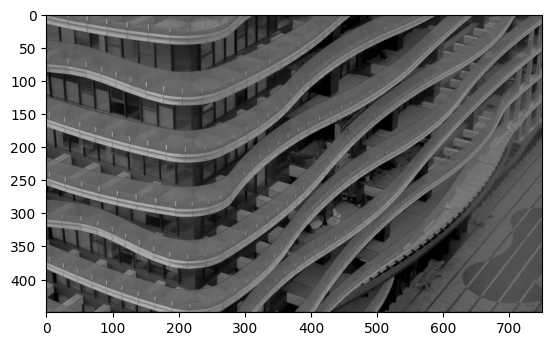

In [ ]:
#TODO: implement square root transformation
def square_root_transformation(image):
    c = 255 / (np.sqrt(255))
    result = c * np.sqrt(image)
    result = np.clip(result, 0, 255).astype(np.uint8)
    return result

square_root_image = square_root_transformation(image)

plt.imshow(cv2.cvtColor(square_root_image, cv2.COLOR_BGR2RGB))
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
            <font face="B Mitra" size=5 color='e74c3c'>
            هیستوگرام تصویر اولیه و نهایی را رسم کرده و تفاوت آن‌ها را تحلیل کنید.
            </font>
        </p>
    </div>
    
</font>

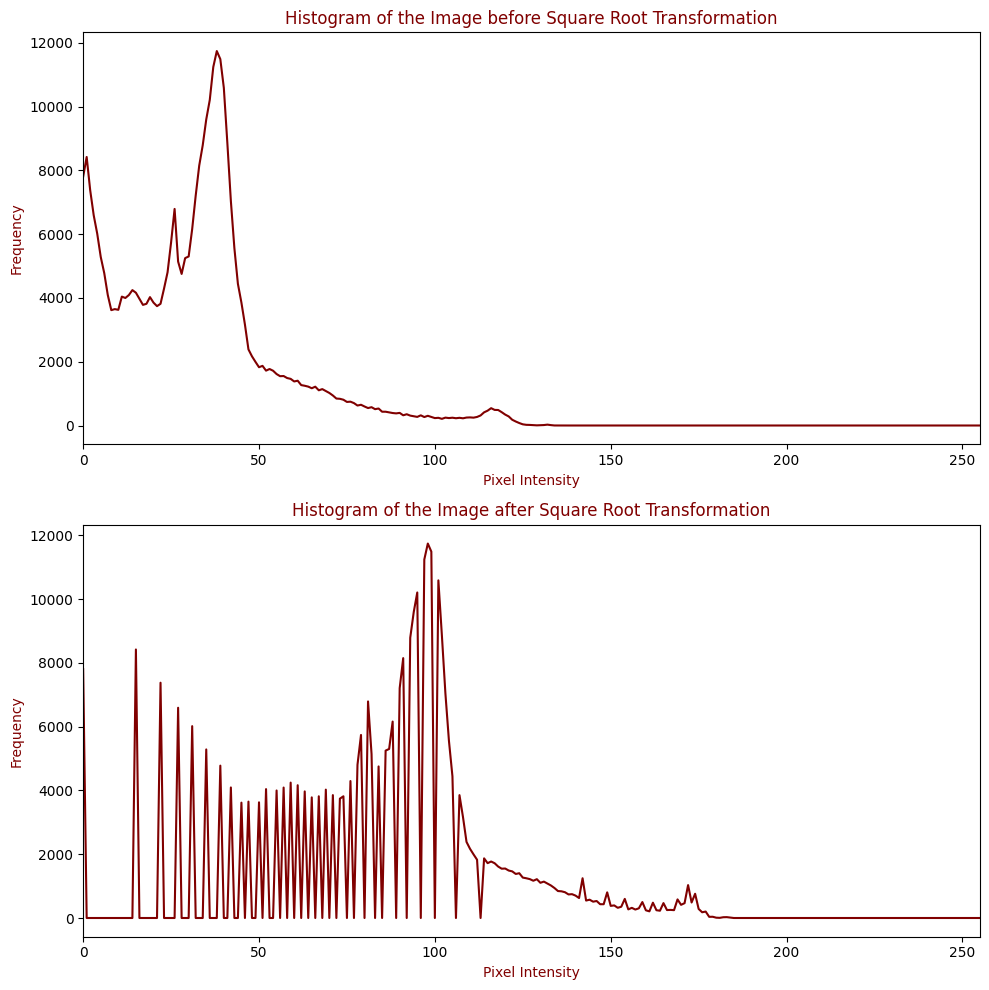

In [ ]:
#TODO: plot the histogram of the image before and after the transformation
hist_original_img = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_square_img = cv2.calcHist([square_root_image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(hist_original_img, color='maroon')
plt.title('Histogram of the Image before Square Root Transformation', color='maroon')
plt.xlabel('Pixel Intensity', color='maroon')
plt.ylabel('Frequency', color='maroon')
plt.xlim([0, 255])

plt.subplot(2, 1, 2)
plt.plot(hist_square_img, color='maroon')
plt.title('Histogram of the Image after Square Root Transformation', color='maroon')
plt.xlabel('Pixel Intensity', color='maroon')
plt.ylabel('Frequency', color='maroon')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
همان‌طور که در تحلیل نمودار بخش قبلی هم گفته شد، هیستوگرام تصویر اولیه تمرکز بیش‌تری در ناحیه شدت‌های پایین روشنایی دارد و در نتیجه تصویر تیره و با کنتراست پایین می‌باشد. بعد از تبدیل شدت ریشه دوم هیستوگرام دامنه‌ی وسیع‌تری از شدت‌های روشنایی (از حدود 0 تا 170) را در برگرفته و تنوع روشنایی در بخش‌های تیره بیش‌تر شده است. به عبارتی دیگر، این تبدیل منجر به بهبود کنتراست و روشنایی تصویر شده و رنج دینامیکی را گسترش داده است و جزئیات بیش‌تری از نقاط تیره و روشن آشکار شده است.
</p>
</font>
</div>
<hr>

<font face="B Mitra" size="4">
    <div dir="rtl">
    <h3>تابع تبدیل شدت گاما</h3>
        <p>
            Gamma correction یا تصحیح گاما یک عملیات غیرخطی است که برای کدگذاری و رمزگشایی مقادیر روشنایی یا مقادیر سه‌بعدی در سیستم‌های ویدیویی یا تصاویر ثابت استفاده می‌شود. گاما کارکشن در ساده‌ترین حالت با استفاده از معادله‌ای به صورت زیر تعریف می‌شود:
        </p>
        <p>
            <code>V<sub>out</sub> = C V<sub>in</sub><sup>&gamma;</sup></code>
        </p>
        <p>
            که در آن مقدار ورودی غیر منفی V<sub>in</sub> به توان &gamma; رسانده شده و با ثابت C ضرب می‌شود تا مقدار خروجی V<sub>out</sub> به دست آید.
        </p>
        <p>
            <font face="B Mitra" size=5 color='e74c3c'>
            این تابع را مطابق با روش گفته شده در جزوه پیاده‌سازی کنید و سپس تابع را بر روی تصویر اعمال کرده و تصویر جدید را نمایش دهید.
            <br>
            مقدار مناسب برای پارامتر گاما توسط شما باید انتخاب شود. (مقدار دقیق مدنظر نبوده و تنها باید مقداری انتخاب شود که سبب بهبود تصویر شود.)
        </p>
            </font>
    </div>
</font>


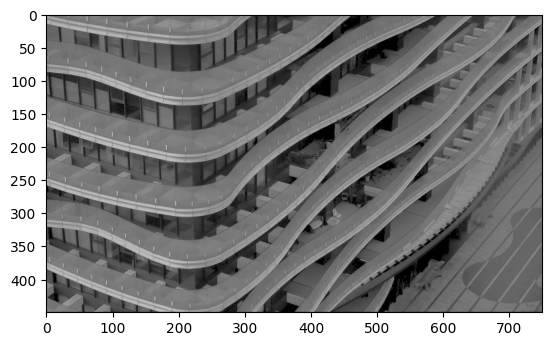

In [ ]:
#TODO: implement gamma transformation
def gamma_transformation(image, gamma):
    c = 255 / (255 ** gamma)
    result = c * (image.astype(np.float32) ** gamma)
    result = np.clip(result, 0, 255).astype(np.uint8)
    return result

gamma = 0.4
gamma_image = gamma_transformation(image, gamma)

plt.imshow(cv2.cvtColor(gamma_image, cv2.COLOR_BGR2RGB))
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
            <font face="B Mitra" size=5 color='e74c3c'>
            هیستوگرام تصویر اولیه و نهایی را رسم کرده و تفاوت آن‌ها را تحلیل کنید.
            </font>
        </p>
    </div>
    
</font>

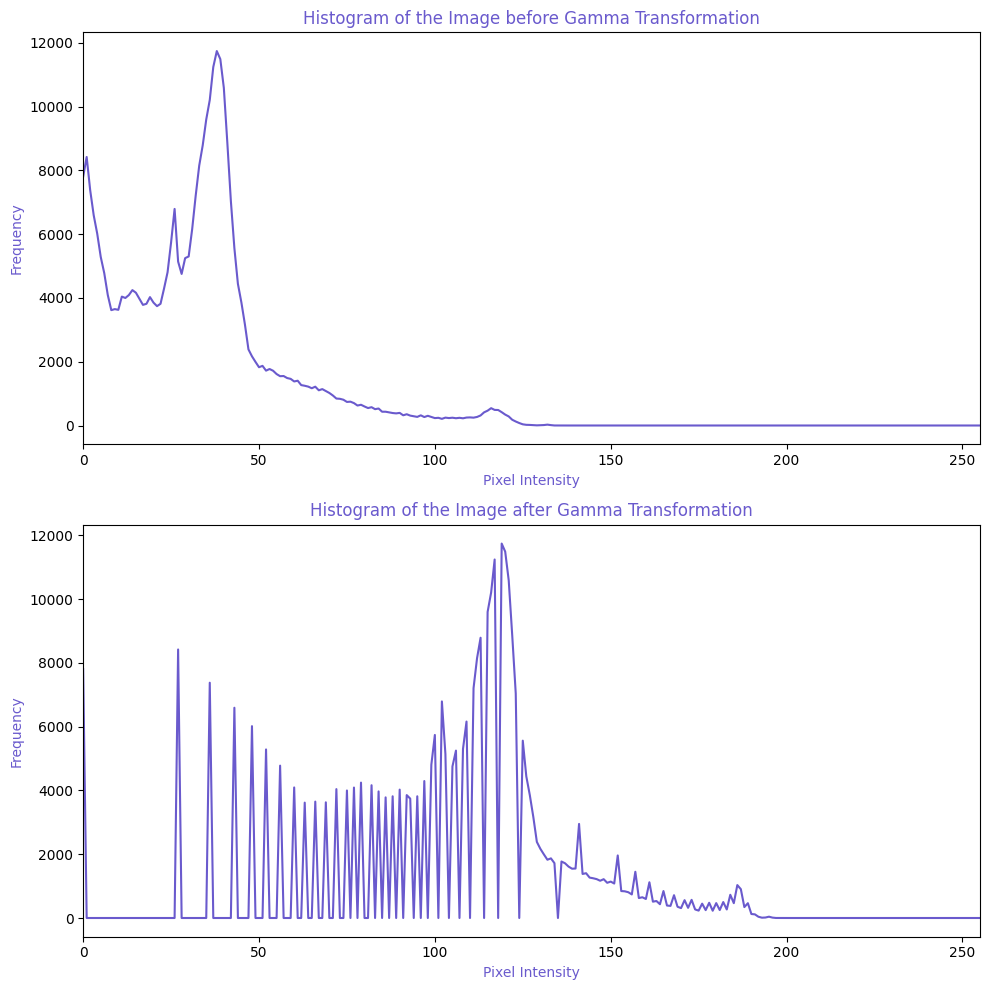

In [ ]:
#TODO: plot the histogram of the image before and after the transformation
hist_original_img = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_gamma_img = cv2.calcHist([gamma_image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(hist_original_img, color='slateblue')
plt.title('Histogram of the Image before Gamma Transformation', color='slateblue')
plt.xlabel('Pixel Intensity', color='slateblue')
plt.ylabel('Frequency', color='slateblue')
plt.xlim([0, 255])

plt.subplot(2, 1, 2)
plt.plot(hist_gamma_img, color='slateblue')
plt.title('Histogram of the Image after Gamma Transformation', color='slateblue')
plt.xlabel('Pixel Intensity', color='slateblue')
plt.ylabel('Frequency', color='slateblue')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
همان‌طور که در بخش‌های قبلی ذکر شد، در هیستوگرام تصویر اولیه، توزیع شدت پیکسل‌ها بیش‌تر در ناحیه‌های تیره متمرکز است که نشان‌دهنده تیرگی تصویر و پایین بودن کنتراست است. پس از تبدیل گاما، توزیع پیکسل‌ها گسترده‌تر شده و مقادیر بیشتری در نواحی میانه (از 30 تا 180) قرار دارند. این تغییرات منجر به بهبود روشنایی، افزایش کنتراست و گسترش رنج دینامیکی تصویر شده است، که جزئیات بیشتری را نمایان می‌سازد.
</p>
</font>
</div>
<hr>

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3>کشش هیستوگرام </h3>
          <p>کشش هیستوگرام رویکردی است که دامنه شدت‌های موجود در تصویر را فراگیر می‌کند تا کنتراست را افزایش دهد؛ این کار با کشیدن انتهاهای هیستوگرام تصویر و توزیع دوباره شدت‌ها در کل دامنه ممکن انجام می‌شود. در مقابل، مسطح‌سازی هیستوگرام به فرآیند تنظیم توزیع شدت نور در هیستوگرام اطلاق می‌گردد به گونه‌ای که تمامی شدت‌ها بطور یکنواخت در دسترس باشند، این امر باعث بهبود کنتراست کلی در تصویر می‌شود.<br>
            <br>
            <font face="B Mitra" size=5 color='e74c3c'>
    این روش را بر روی تصویر قبل اعمال کرده و تصویر نهایی را نمایش دهید. (پیاده سازی این روش باید توسط خود شما صورت بگیرد)
        </font>
        </p>
    </div>
</font>

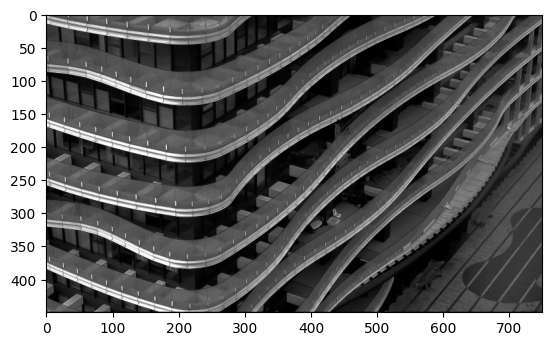

In [80]:
#TODO: implement histogram stretching method
low, high = np.percentile(image.flatten(), (0.5, 99.5))
stretched_image = np.clip(image, low, high)
stretched_image = (255 * (stretched_image - low) / (high - low)).astype(np.uint8)

plt.imshow(cv2.cvtColor(stretched_image, cv2.COLOR_BGR2RGB))
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
           <font face="B Mitra" size=5 color='e74c3c'>
            هیستوگرام تصویر اولیه و نهایی را رسم کرده و تفاوت آن‌ها را تحلیل کنید.
            </font>
        </p>
    </div>
    
</font>

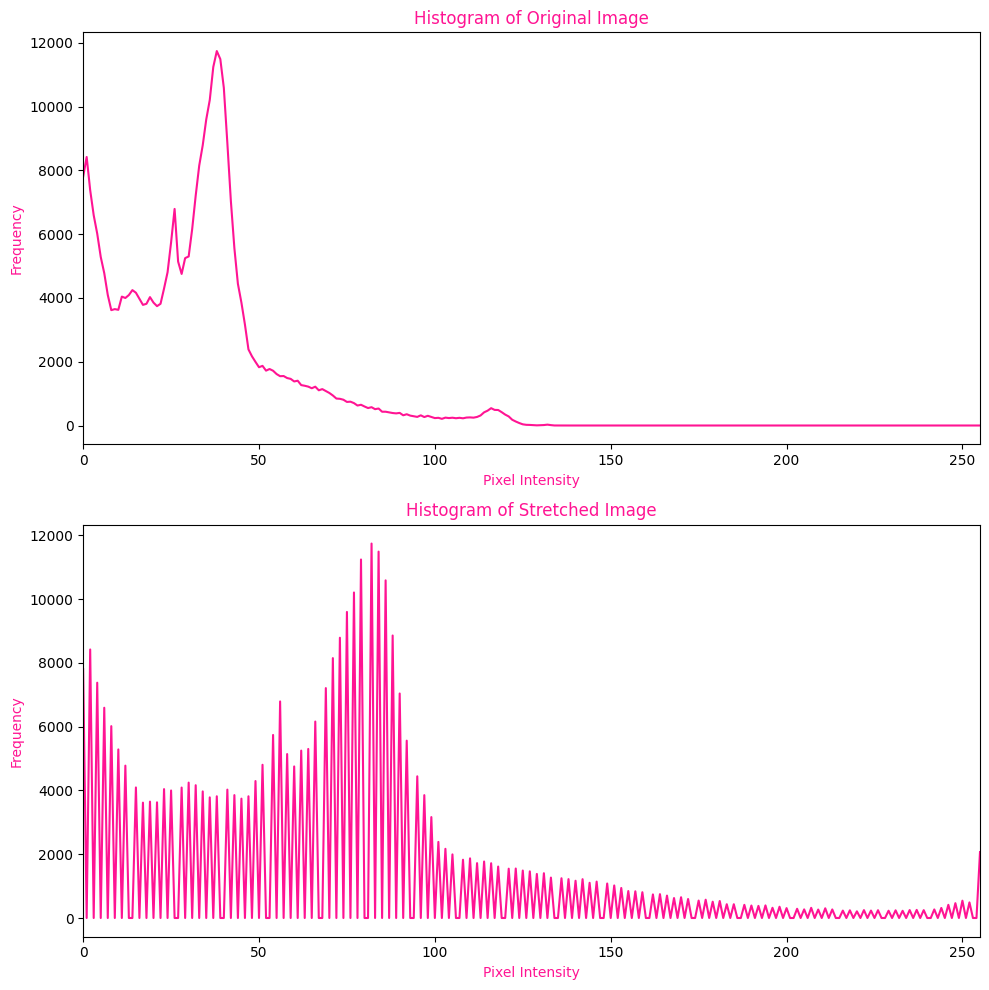

In [81]:
#TODO: plot the histogram of the image before and after the transformation
hist_original_img = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_stretched_image = cv2.calcHist([stretched_image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(hist_original_img, color='deeppink')
plt.title('Histogram of Original Image', color='deeppink')
plt.xlabel('Pixel Intensity', color='deeppink')
plt.ylabel('Frequency', color='deeppink')
plt.xlim([0, 255])

plt.subplot(2, 1, 2)
plt.plot(hist_stretched_image, color='deeppink')
plt.title('Histogram of Stretched Image', color='deeppink')
plt.xlabel('Pixel Intensity', color='deeppink')
plt.ylabel('Frequency', color='deeppink')
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
طبق توضیحات قبلی می‌دانیم که هیستوگرام تصویر اولیه نشان‌دهنده تجمع زیاد پیکسل‌ها در نواحی با شدت پایین است که باعث تیرگی و کنتراست پایین و رنج دینامیکی محدود شده است. در مقابل، هیستوگرام تصویر نهایی نشان‌دهنده یک تغییر اساسی در توزیع شدت‌های پیکسلی است. این هیستوگرام به وضوح نشان می‌دهد که پیکسل‌ها اکنون در بازه‌ای وسیع‌تر توزیع شده‌اند، که نشان‌گر بهبود روشنایی و کنتراست است. وجود قله‌های جدید در این هیستوگرام به این معناست که تصویر دارای جزئیات بیشتری است و نواحی تیره و روشن بهتر نمایان می‌شوند. همچنین رنج دینامیکی تصویر افزایش یافته است.
تکنیکی که ما در اینجا برای کشش هیستوگرام استفاده کرده‌ایم، این است که با حذف ۱٪ از پیکسل‌های پرت کشش هیستوگرام را بهبود داده‌ایم. در واقع این عمل باعث می‌شود که هیستوگرام نه تنها بهتر متعادل شود، بلکه شامل شدت‌های مفیدتری باشد که در کیفیت تصویر مؤثرند.
با این تغییرات، تصویر نهایی واضح‌تر، روشن‌تر و دارای کنتراست بهتری نسبت به تصویر اولیه است.
</p>
</font>
</div>
<hr>

<font face="B Mitra" size=4>
    <div dir="rtl">
        <h3>مسطح‌سازی هیستوگرام </h3>
          <p> مسطح‌سازی هیستوگرام به فرآیند تنظیم توزیع شدت نور در هیستوگرام اطلاق می‌گردد به گونه‌ای که تمامی شدت‌ها بطور یکنواخت در دسترس باشند، این امر باعث بهبود کنتراست کلی در تصویر می‌شود.<br>
            <br>
            <font face="B Mitra" size=5 color='e74c3c'>
    این روش را بر روی تصویر قبل اعمال کرده و تصویر نهایی را نمایش دهید. (پیاده سازی این روش باید توسط خود شما صورت بگیرد.)
        </font>
        </p>
    </div>
</font>

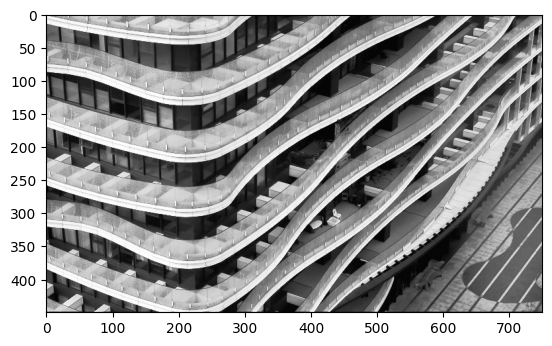

In [82]:
#TODO: implement histogram equalization method
hist_original, bins = np.histogram(image.flatten(), 256, [0, 256])
cdf = hist_original.cumsum()
cdf_normalized = cdf / cdf[-1]
equalized_image = (255 * cdf_normalized).astype(np.uint8)[image] # g(i) = 255 * CDF(i)

plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.show()

<font face="B Mitra" size=4>
    <div dir="rtl">
        <p>
            <font face="B Mitra" size=5 color='e74c3c'>
            هیستوگرام تصویر اولیه و نهایی را رسم کرده و تفاوت آن‌ها را تحلیل کنید. همچنین در هر هیستوگرام تابع توزیع تجمعی(CDF) شدت‌ها را نیز رسم کنید.
            </font>
        </p>
    </div>
    
</font>

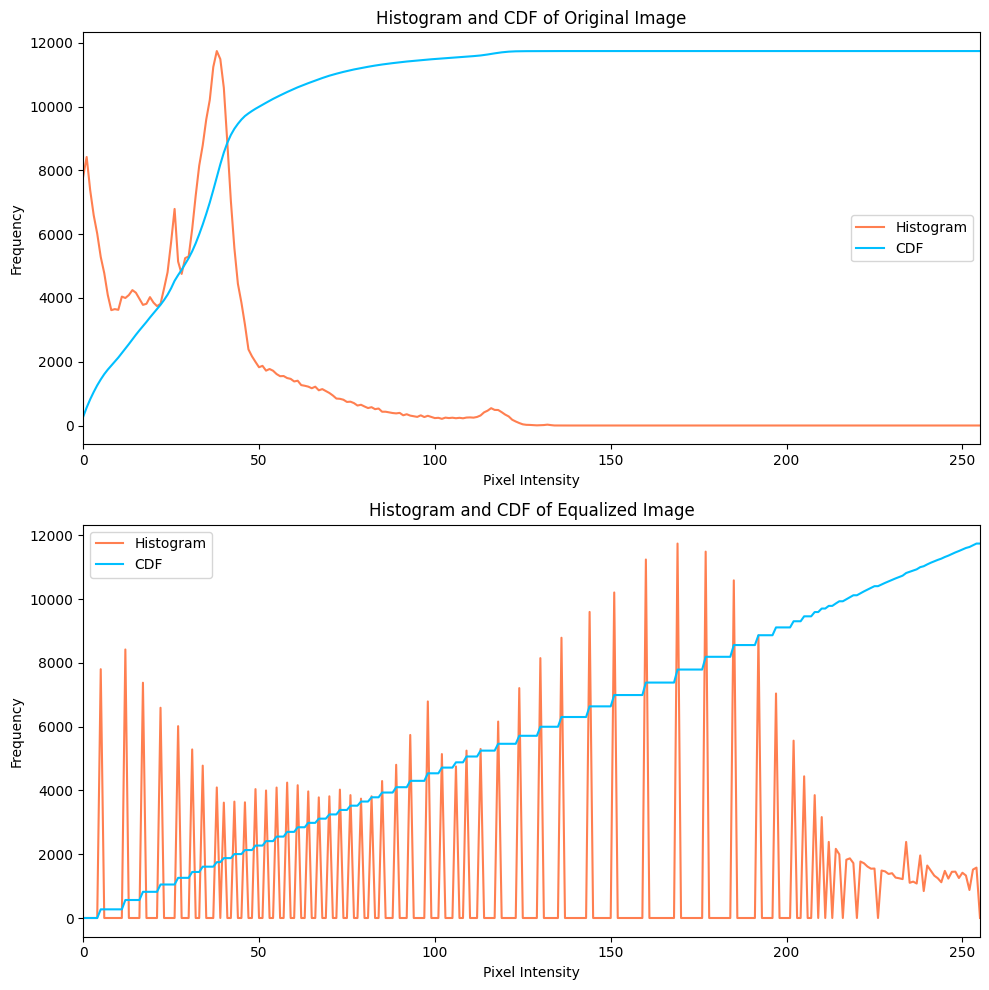

In [83]:
#TODO: plot the histogram of the image before and after the transformation(Don't forget Cumulative Distribution Function)
cdf_original = cdf * hist_original.max() / cdf.max()
hist_equalized, bins = np.histogram(equalized_image.flatten(), 256, [0, 256])
cdf_equalized = hist_equalized.cumsum()
cdf_equalized_normalized = cdf_equalized * hist_equalized.max() / cdf_equalized.max()

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(hist_original, color='coral', label='Histogram')
plt.plot(cdf_original, color='deepskyblue', label='CDF')
plt.title('Histogram and CDF of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.xlim([0, 255])

plt.subplot(2, 1, 2)
plt.plot(hist_equalized, color='coral', label='Histogram')
plt.plot(cdf_equalized_normalized, color='deepskyblue', label='CDF')
plt.title('Histogram and CDF of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
با اعمال مسطح‌سازی هیستوگرام روی تصویر، به وضوح در هیستوگرام مربوط به آن دیده می‌شود که توزیع شدت پیکسل‌ها به طور یکنواخت‌تری در کل دامنه پخش شده است و قله‌ها در هیستوگرام تصویر نهایی نسبت به هیستوگرام تصویر اولیه به وضوح کاهش یافته‌اند و به جای آن توزیع یکنواخت‌تری مشاهده می‌شود. بنابراین با مسطح‌سازی هیستوگرام در این تصویر کنتراست افزایش یافته و همچنین روشنایی تصویر بهبود پیدا کرده است؛ چرا که پیکسل‌ها دیگر در شدت‌های پایین که باعث تیرگی تصویر شده است، متمرکز نیستند.
<br>
در تصویر اولیه، تابع توزیع تجمعی شدت‌ها با شیب‌های نامنظم افزایش می‌یابد، که نشان‌دهنده تجمع غیر یکنواخت پیکسل‌ها در نواحی تیره و روشن می‌باشد که منجر به کاهش کنتراست تصویر شده است. در تصویر نهایی، CDF به صورت خطی‌تر و یکنواخت‌تر افزایش می‌یابد که نمایان‌گر توزیع متعادل‌تری از شدت‌ها می‌باشد.

</p>
</font>
</div>
<hr>

<font face="B Mitra" size="4">
    <div dir="rtl">
        <h3>Bit-Plane Slicing</h3>
        <p>
            Bit-Plane Slicing یک تکنیک در پردازش تصویر است که به تجزیه و تحلیل تصویر در سطح بیت‌های آن می‌پردازد. هر تصویر دیجیتال از مجموعه‌ای از پیکسل‌ها تشکیل شده که هر پیکسل مقداری عددی (معمولاً در مقیاس ۰ تا ۲۵۵) دارد. در <b>Bit-Plane Slicing</b>، تصویر به قسمت‌هایی تقسیم می‌شود که هر قسمت نمایانگر یک بیت خاص از داده‌های پیکسل‌ها است. به عبارت دیگر، این تکنیک امکان استخراج و مشاهده بیت‌های مختلف تصویر را فراهم می‌کند. در نتیجه، یک تصویر با عمق بیت 8 می‌تواند به ۸ لایه مختلف تقسیم شود که هر لایه نمایانگر یک بیت از مقدار هر پیکسل است.
        </p>
        <p>
            با استخراج این بیت‌ها می‌توانیم اطلاعات مختلفی در مورد تصویر بدست آوریم. این روش می‌تواند برای فشرده‌سازی تصویر، حذف نویز یا تغییرات مختلف دیگر کاربرد داشته باشد.
        </p>
        <p>
            در ابتدا، شما با اجرا بلاک زیر یک تصویر خاکستری (grayscale)  با عمق بیت 16 دریافت می‌کنید که باید بیت‌های مختلف آن را استخراج کنید و سپس یک تصویر بازسازی‌شده بسازید.
        </p>
    </div>
</font>


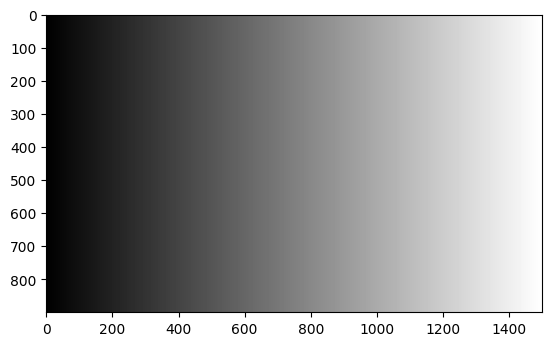

In [ ]:
width, height = 1500, 900
gradient = np.linspace(0, 65535, width, dtype=np.uint16)
image = np.tile(gradient, (height, 1))
#TODO: Show the image
plt.imshow(image, cmap='gray')
plt.show()

<font face="B Mitra" size="5" color = 'e74c3c'>
    <div dir="rtl">
        <p>
             یک تابع بنویسید که با استفاده از آن بتوانید بیت‌های مختلف تصویر را استخراج کنید. هر بیت در تصویر شامل یک لایه است که به صورت جداگانه قابل مشاهده است. در ادامه باید تمام Bit-planeهای استخراج شده را نمایش دهید، شما باید هر یک از آن‌ها را به صورت یک تصویر نشان دهید تا بتوانید نحوه تقسیم تصویر را مشاهده کنید.
        </p>
    </div>
</font>


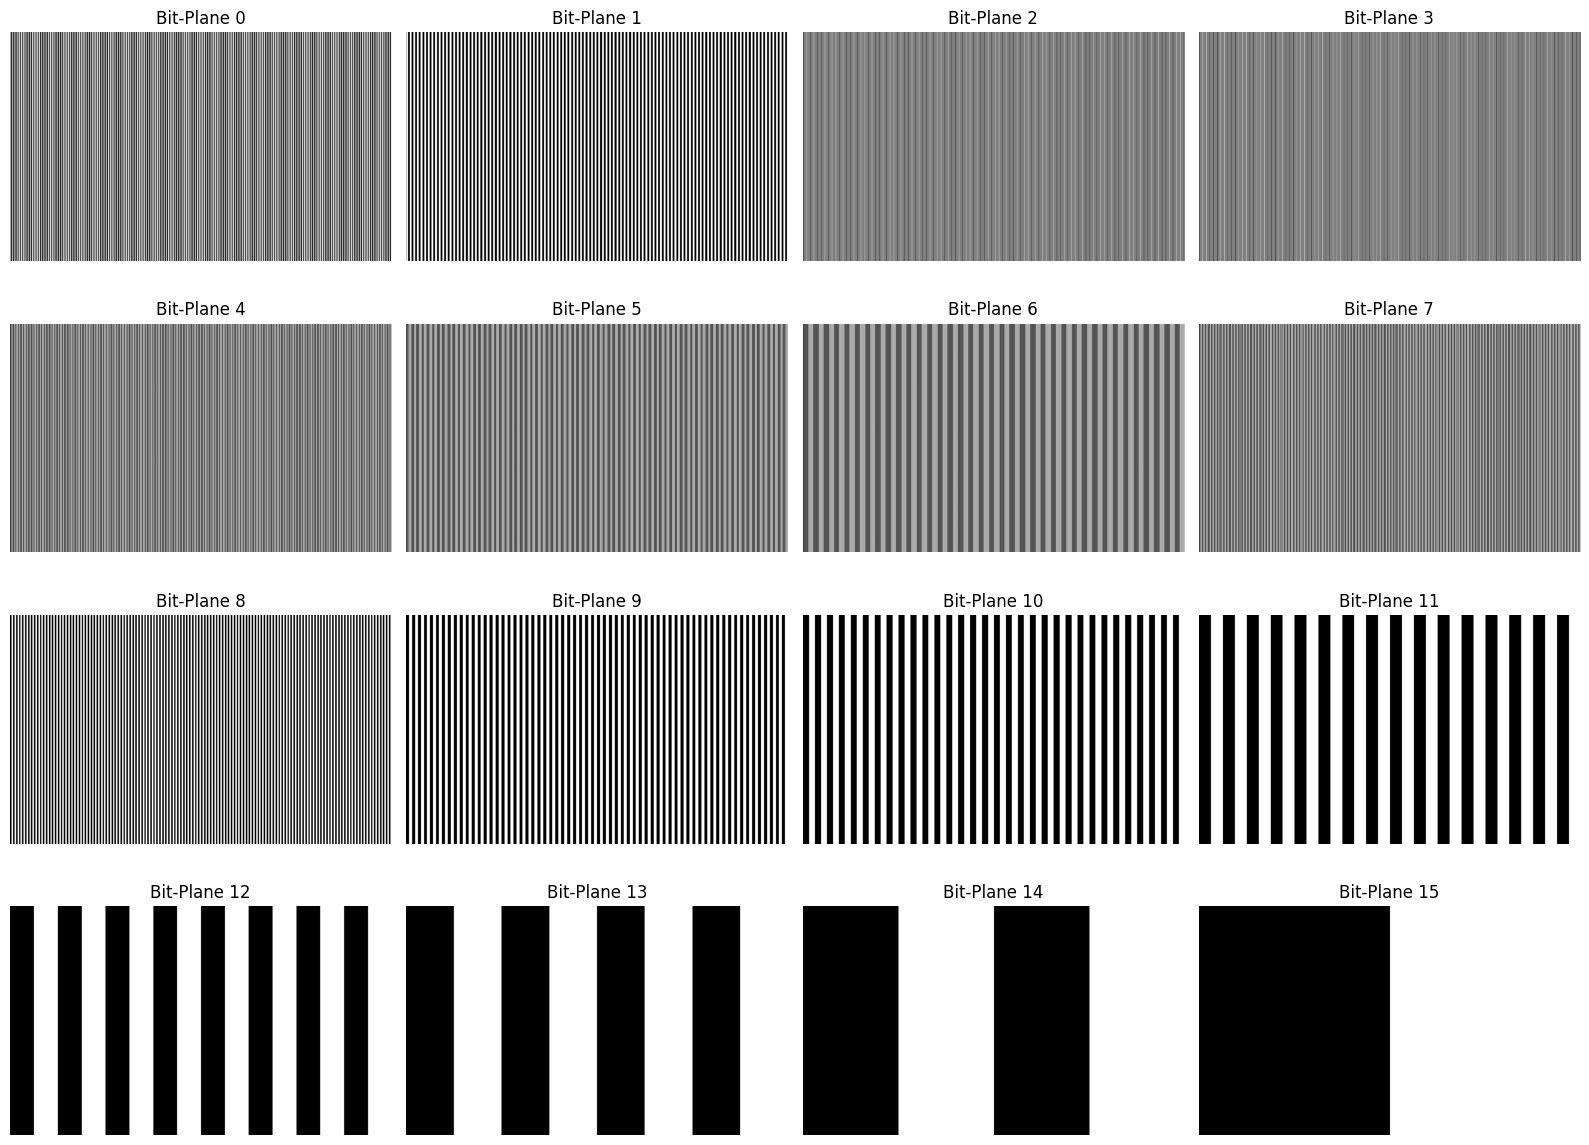

In [ ]:
#TODO: implement bit-plane slicing method and show all bit-planes of the image
def bit_plane_slicing_method(image):
    bit_planes = [(image >> i) & 1 for i in range(16)]
    return bit_planes

bit_planes = bit_plane_slicing_method(image)

plt.figure(figsize=(16, 12))
for i, bit_plane in enumerate(bit_planes):
    plt.subplot(4, 4, i+1)
    plt.imshow(bit_plane, cmap='gray')
    plt.title(f'Bit-Plane {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

<font face="B Mitra" size=5 color='e74c3c'>
    <div dir="rtl">
        <p>
            پس از استخراج بیت‌ها، شما باید ترکیبی از بیت‌های با ارزش‌تر را انتخاب کنید <b>(۸ بیت با ارزش‌تر)</b> و از آن‌ها برای بازسازی یک تصویر جدید استفاده کنید. پس از بازسازی تصویر، آن را با تصویر اصلی از نظر <b>کیفیت(مقایسه چشمی کافیست) و حجم(میزان فضای اختصاص داده شده به تصویر در رم)</b> مقایسه کنید.
        </p>
    </div>
</font>


Original Image Size: 2700000 bytes
Reconstructed Image Size: 1350000 bytes


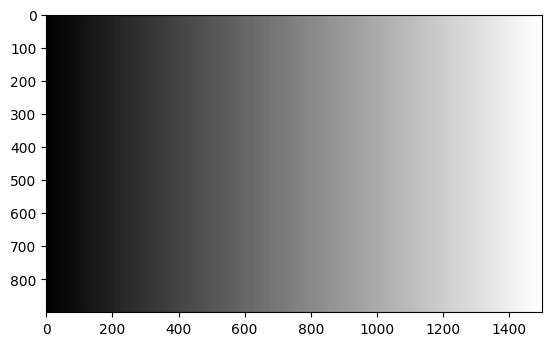

In [ ]:
#TODO: recunstruct the image from the most significant 8 bits of the image and compare it with the original image
reconstructed_image = np.zeros_like(bit_planes[0], dtype=np.uint8)
for bit in range(8, 16):
    reconstructed_image += (bit_planes[bit] << (bit - 8))

print(f"Original Image Size: {image.nbytes} bytes")
print(f"Reconstructed Image Size: {reconstructed_image.nbytes} bytes")

plt.imshow(reconstructed_image, cmap='gray')
plt.show()

<div dir=rtl>
<p>
<font face="B Mitra" size=5, color='cyan'>
1- کیفیت:
<br>
تصویر بازسازی‌شده از ۸ بیت با ارزش‌تر تولید شده است، بنابراین به صورت کلی کیفیت آن مشابه تصویر اصلی است و به آن بسیار نزدیک می‌باشد، زیرا این بیت‌ها بخش‌های مهم تصویر را شامل می‌شوند و اطلاعات مهم بصری را حفظ می‌کنند.
تفاوت‌های جزئی تا حد کمی وجود دارد، زیرا بیت‌های با ارزش کمتر در تصویر بازسازی‌شده حضور ندارند، اما مشاهده آن‌ها شاید به سختی و با ریزبینی زیاد قابل انجام باشد.
<br>
2- حجم:
<br>
حجم تصویر بازسازی‌شده نصف حجم تصویر اصلی می‌باشد، زیرا تصویر اصلی به صورت آرایه‌های 16 بیتی (dtype=np.unit16) و تصویر بازسازی‌شده به صورت آرایه‌های 8 بیتی (dtype=np.uint8) تعریف شده‌ است.
در واقع تصویر بازسازی‌شده 8 بیت برای هر پیکسل استفاده می‌کند و حجم تصویر را کاهش می‌دهد. به این ترتیب، فقط 8 بیت با ارزش‌تر را نگه می‌دارد و آنها را در نوع داده‌ی uint8 ذخیره می‌کند، در حالیکه تصویر اصلی از 16 بیت برای هر پیکسل استفاده می‌کند.
<br>
در واقع گویی ما در اینجا یک نوع فشرده‌سازی انجام داده‌ایم؛ در عین حفظ کیفیت کلی تصویر و اطلاعات مهم آن، حجم تصویر به طور قابل توجهی کاهش یافته است.
</p>
</font>
</div>
<hr>

<font face="B Mitra" size="4">
    <div dir="rtl">
        <h3>آستانه گیری</h3>
        <p>
            <b>Thresholding</b> یا آستانه‌گیری یک تبدیل تکه‌ای خطی است که در آن شدت پیکسل‌ها بر اساس یک آستانه مشخص تغییر می‌کند. به این صورت که اگر مقدار پیکسل از آستانه کمتر باشد برابر ۰ و در غیر این صورت ۲۵۵ در نظر گرفته می‌شود.
        </p>
        <p>
            در تبدیل تکه‌ای آستانه‌گیری، برای هر پیکسل در تصویر، از رابطه زیر استفاده می‌شود:
        </p>
        <p>
            <code>V<sub>out</sub> = 0 if V<sub>in</sub> < T else 255</code>
        </p>
        <p>
            که در آن:
            <ul>
                <li><code>V<sub>in</sub></code>: مقدار ورودی (شدت پیکسل)</li>
                <li><code>V<sub>out</sub></code>: مقدار خروجی (شدت پیکسل جدید)</li>
                <li><code>T</code>: مقدار آستانه است که برای جداسازی نواحی روشن و تاریک تصویر استفاده می‌شود.</li>
            </ul>
        </p>
        <br>
        <h3>آستانه‌گیری محلی:</h3>
        <p>
            در آستانه‌گیری محلی (Local Thresholding) برخلاف آستانه‌گیری کلی که از یک آستانه ثابت برای تمام پیکسل‌ها استفاده می‌کند، هر پیکسل بر اساس شدت پیکسل‌های اطراف خود آستانه‌گیری می‌شود. در این روش برای تعیین حد آستانه هر پیکسل از پیکسل‌های همسایه (در همه جهت‌ها) کمک می‌گیرند و حد آستانه را تعریف می‌کنند. به این صورت که در ابتدا یک تعداد پیکسل همسایه در یک پنجره انتخاب می شود، و سپس میانگین مقدار شدت روشنایی پیکسلهای همسایه محاسبه می شود و بر اساس آن تصمیم گرفته می‌شود که پیکسل مورد نظر به ۲۵۵ یا ۰ تبدیل شود.
        </p>
        <br>
        <font face="B Mitra" size=5 color='e74c3c'>
        در این تمرین، شما باید آستانه‌گیری محلی را پیاده‌سازی کنید: به این صورت که برای هر پیکسل میانگین شدت پیکسل‌های اطراف را محاسبه کرده(window_size را برابر ۱۰ در نظر بگیرید) و اگر شدت پیکسل موردنظر از ۸۵ درصد این میانگین کمتر بود مقدار آن برابر ۰ و در غیر این صورت برابر ۲۵۵ در نظر گرفته شود. در نهایت تصویر اصلاح‌شده را نمایش دهید.
        </font>
    </div>
</font>


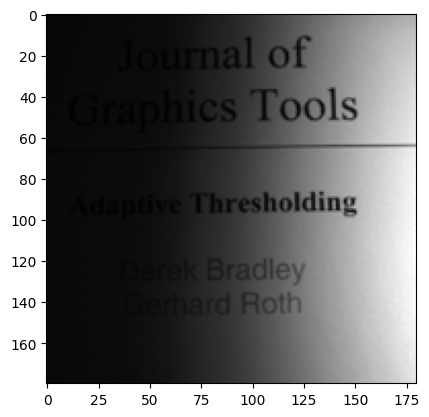

In [ ]:
image = read_image_from_url("https://i.ibb.co/W6H4zhW/thrsh.jpg", cv2.IMREAD_GRAYSCALE)
#TODO: show the image
plt.imshow(image, cmap='gray')
plt.show()

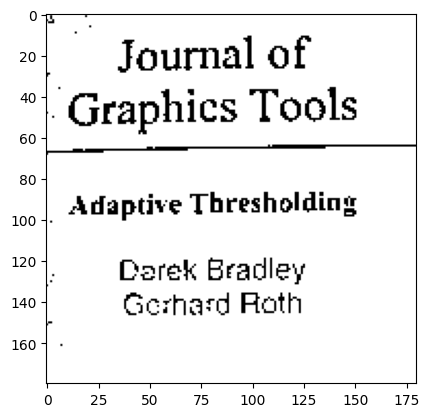

In [ ]:
#TODO: implement local thresholding method
window_size = 10

height, width = image.shape[:2]
corrected_image = np.zeros((height, width), dtype=np.uint8)

padded_image = cv2.copyMakeBorder(image, window_size//2, window_size//2, window_size//2, window_size//2, cv2.BORDER_REFLECT)

for i in range(height):
    for j in range(width):
        window = padded_image[i:i + window_size, j:j + window_size]
        threshold = np.mean(window) * 0.85
        corrected_image[i, j] = 0 if image[i, j] < threshold else 255

plt.imshow(corrected_image , cmap='gray')
plt.show()